In [1]:
!pip install changeforest scikit-learn numpy


In [2]:
import numpy as np

# Create a covariance matrix Sigma with 0.7 off-diagonal and 1 on-diagonal values
Sigma = np.full((5, 5), 0.7)
np.fill_diagonal(Sigma, 1)

# Set the random seed and generate the data
rng = np.random.default_rng(12)
X = np.concatenate(
    (
        # 200 samples from standard normal distribution (mean=0, std=1)
        rng.normal(0, 1, (200, 5)),
        
        # 200 samples from a multivariate normal distribution with the specified Sigma
        rng.multivariate_normal(np.zeros(5), Sigma, 200, method="cholesky"),
        
        # Another 200 samples from standard normal distribution (mean=0, std=1)
        rng.normal(0, 1, (200, 5)),
    ),
    axis=0
)

# Show the shape of X to verify
X.shape


(600, 5)

Detected change points: [ 35  63  70  72 107 109 111 128 161 186 199 274 276 350 384 400 416 454
 458 473 477 486 509 511 525 528 532 564 565 568]


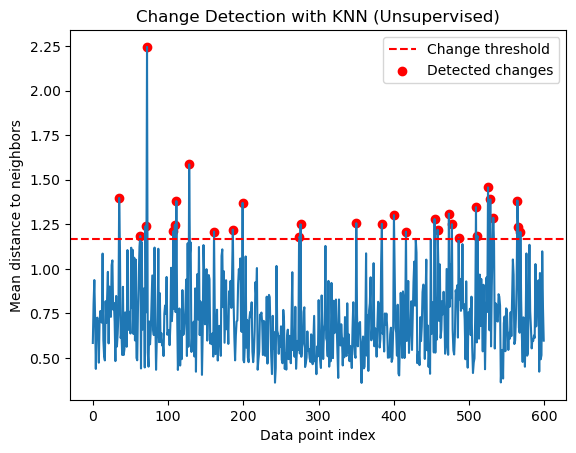

In [4]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Generate synthetic data (same as before)
Sigma = np.full((5, 5), 0.7)
np.fill_diagonal(Sigma, 1)
rng = np.random.default_rng(12)

# Create a dataset similar to before
X = np.concatenate(
    (
        rng.normal(0, 1, (200, 5)),
        rng.multivariate_normal(np.zeros(5), Sigma, 200, method="cholesky"),
        rng.normal(0, 1, (200, 5)),
    ),
    axis=0
)

# Normalize the data (optional but common for distance-based methods)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize KNN model for unsupervised anomaly detection
knn = NearestNeighbors(n_neighbors=5)

# Fit KNN model
knn.fit(X_scaled)

# Calculate the distances and indices of the nearest neighbors
distances, indices = knn.kneighbors(X_scaled)

# Calculate the mean distance for each point (this is the anomaly score)
mean_distances = distances.mean(axis=1)

# Detect significant changes by checking where the distance significantly increases
threshold = np.percentile(mean_distances, 95)  # 95th percentile threshold
change_points = np.where(mean_distances > threshold)[0]

# Print the change points
print(f"Detected change points: {change_points}")

# Plot the results
plt.plot(mean_distances)
plt.axhline(y=threshold, color='r', linestyle='--', label='Change threshold')
plt.scatter(change_points, mean_distances[change_points], color='r', label='Detected changes')
plt.legend()
plt.title("Change Detection with KNN (Unsupervised)")
plt.xlabel("Data point index")
plt.ylabel("Mean distance to neighbors")
plt.show()
